<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
#Вы можете скачать необходимую таблицу по адресу: https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view
#Для удобства скачанная таблица была переименована в hh_database.csv

hh_df = pd.read_csv('data/hh_database.csv', sep = ';')
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date

display(hh_df.shape)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
display(hh_df)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,2019-04-16,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,2019-12-04,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,2019-04-16,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,2019-08-04,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,2019-04-22,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,2019-04-22,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,2019-04-22,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,2019-09-04,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,2019-04-26,Имеется собственный автомобиль


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
print(hh_df.info())
print(hh_df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
#ваш код здесь
display(hh_df.isnull().sum())

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [7]:
#Сколько уникальных значений содержится в столбце «Опыт работы»?
display(hh_df['Опыт работы'].nunique())
#Какая из искомых должностей самая распространённая? Введите название.
display(hh_df['Ищет работу на должность:'].mode()[0])

44413

'Системный администратор'

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
#ваш код здесь
education = lambda x: x[0] + education(x[1:]) if not tuple(x.split(' '))[1] == "образование" else x.split(' ')[0]
 
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(education)
display(hh_df['Образование'].unique())
display(hh_df[hh_df['Образование']=='Среднее']['Образование'].count())

hh_df.drop(['Образование и ВУЗ'], axis=1, inplace=True) 

array(['Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Среднее'],
      dtype=object)

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
#ваш код здесь

gender_edit = lambda x: 'М' if tuple(x.split(','))[0].replace(' ', '') == 'Мужчина' else 'Ж'
age_edit = lambda x: ''.join([y for y in tuple(x.split(','))[1] if y.isdigit()]) 

hh_df['Пол'] = hh_df['Пол, возраст'].apply(gender_edit)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(age_edit)
hh_df['Возраст']= hh_df['Возраст'].apply(int)

display(round(hh_df['Пол'].value_counts(normalize=True)*100, 2))
display(round(hh_df['Возраст'].mean(),1))

hh_df.drop(['Пол, возраст'], axis=1, inplace=True)

М    80.93
Ж    19.07
Name: Пол, dtype: float64

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
#ваш код здесь

list_year_words = ['год', 'года', 'лет']
list_month_words = ['месяц', 'месяца', 'месяцев']

def experience_edit(words):
    if words is np.NAN or words == "Не указано":
        return None
    else:
        count_years = 0
        count_months = 0
        found_months = False
        found_years = False
        list_words = words.split(' ')[2:8]
        for index, word in enumerate(list_words):
            if list_words[index-1].isdigit() and word in list_year_words and found_years == False:
                count_years = int(list_words[index-1])
                found_years = True
            elif list_words[index-1].isdigit() and word in list_month_words and found_months == False:
                count_months = int(list_words[index-1])
                found_months = True
        return int(round(count_years*12 + count_months, 0))
       
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(experience_edit)
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы (месяц)']

display(int(hh_df['Опыт работы (месяц)'].median()))

hh_df.drop(['Опыт работы'], axis=1, inplace=True)

100

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [11]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
no_will_to_travel = ['не готов к переезду ', 'не хочу переехать', 'не готова к переезду', 'не хочу переезжать']
np_will_business_trips = ['не готов к командировкам', 'не готова к редким командировкам', 'не готова к командировкам', 'не готов к редким командировкам']


town_info_count_edit = lambda x: ','.join([y for y in tuple(x.split(',')) if y.count("м.") == 0])
#travel_edit = lambda x: False if tuple(x.split(','))[1].count("не ") > 0 else True
#business_trips_edit = lambda x: False if tuple(x.split(','))[2].count("не ") > 0 else True

def travel_edit(string):
    result = True
    for words in string.split(' , '):
        if words.count('перее') and words.count('не'):
            result = False
    return result

def business_trips_edit(string):
    
    if len(string.split(' , ')) < 3:
        return False
    
    result = True
    for words in string.split(' , '):
        if words.count('командировк') and words.count('не'):
            result = False
    return result

def town_edit(words):
    city = words.split(',')[0]
    while city[-1] == ' ':
        city = city[:-1]
    if city.count("Москва") or city.count("Санкт-Петербург"):
        return city
    elif city in million_cities:
        return "город-миллионник"
    else:
        return "другие"

#убираем зависимость от метро
#hh_df["Город, переезд, командировки edited"] = hh_df["Город, переезд, командировки"].apply(town_info_count_edit)
hh_df["Город"] = hh_df["Город, переезд, командировки"].apply(town_edit)
hh_df["Готовность к переезду"] = hh_df["Город, переезд, командировки"].apply(travel_edit)
hh_df["Готовность к командировкам"] = hh_df["Город, переезд, командировки"].apply(business_trips_edit)

#display(business_trips_edit('Екатеринбург ,  м. Уральская , не готов к переезду , готов к командировкам'))

hh_df.drop(['Город, переезд, командировки'], axis=1, inplace=True)

display(round(hh_df['Город'].value_counts(normalize=True)*100, 0))
display(hh_df.groupby(["Готовность к переезду", "Готовность к командировкам"])['Готовность к переезду'].count())
num_percent = int(round((hh_df[(hh_df['Готовность к переезду'] == True) \
    & (hh_df['Готовность к командировкам'] == True)].shape[0] / hh_df.shape[0])*100, 0))
print(f"Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам: {num_percent}%")

Москва              37.0
другие              35.0
город-миллионник    16.0
Санкт-Петербург     11.0
Name: Город, dtype: float64

Готовность к переезду  Готовность к командировкам
False                  False                         11362
                       True                          17495
True                   False                          1714
                       True                          14173
Name: Готовность к переезду, dtype: int64

Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [12]:
#ваш код здесь
employment_edit_fulltime = lambda x: True if x.count("полная занятость") > 0 else False
employment_edit_parttime = lambda x: True if x.count("частичная занятость") > 0 else False
employment_edit_project = lambda x: True if x.count("проектная работа") > 0 else False
employment_edit_internship = lambda x: True if x.count("стажировка") > 0 else False
employment_edit_volunteering = lambda x: True if x.count("волонтерство") > 0 else False

employment_edit_fullday = lambda x: True if x.count("полный день") > 0 else False
employment_edit_shiftwork = lambda x: True if x.count("сменный график") > 0 else False
employment_edit_flexible = lambda x: True if x.count("гибкий график") > 0 else False
employment_edit_remote = lambda x: True if x.count("удаленная работа") > 0 else False
employment_edit_watch = lambda x: True if x.count("вахтовый метод") > 0 else False

hh_df['полная занятость'] = hh_df['Занятость'].apply(employment_edit_fulltime)
hh_df['частичная занятость'] = hh_df['Занятость'].apply(employment_edit_parttime)
hh_df['проектная работа'] = hh_df['Занятость'].apply(employment_edit_project)
hh_df['стажировка'] = hh_df['Занятость'].apply(employment_edit_internship)
hh_df['волонтерство'] = hh_df['Занятость'].apply(employment_edit_volunteering)

hh_df['полный день'] = hh_df['График'].apply(employment_edit_fullday)
hh_df['сменный график'] = hh_df['График'].apply(employment_edit_shiftwork)
hh_df['гибкий график'] = hh_df['График'].apply(employment_edit_flexible)
hh_df['удаленная работа'] = hh_df['График'].apply(employment_edit_remote)
hh_df['вахтовый метод'] = hh_df['График'].apply(employment_edit_watch)

display(hh_df.groupby(["проектная работа", "волонтерство"])['волонтерство'].sum())
display(hh_df.groupby(["вахтовый метод", "гибкий график"])['гибкий график'].sum())

hh_df.drop(['График', 'Занятость'], axis=1, inplace=True)


проектная работа  волонтерство
False             False             0
                  True             50
True              False             0
                  True            436
Name: волонтерство, dtype: int64

вахтовый метод  гибкий график
False           False                0
                True             13273
True            False                0
                True              2311
Name: гибкий график, dtype: int64

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [13]:
#ваш код здесь
exchangeRates_df = pd.read_csv('data/ExchangeRates.csv', sep = ',')
exchangeRates_df['date'] = pd.to_datetime(exchangeRates_df['date']).dt.date

exchange_dict = {
"USD": "USD",
"грн": "UAH",
"EUR": "EUR",
"белруб": "BYN",
"KGS": "KGS",
"сум": "UZS",
"AZN": "AZN",
"KZT": "KZT"
}

def currencyToRub(*data):
    #display(data)
    if data[1].split(' ')[1] != 'руб.':
        if data[1].split(' ')[1].replace('.', '') not in exchange_dict.keys():
            print('didnt fount such key: ', data[1].split(' ')[1].replace('.', ''))
        value = float(exchangeRates_df[ (exchangeRates_df['date'] == data[0]) & (exchangeRates_df['currency'] == exchange_dict[data[1].split(' ')[1].replace('.', '')]) ]['close'])
        proportion = float(exchangeRates_df[ (exchangeRates_df['date'] == data[0]) & (exchangeRates_df['currency'] == exchange_dict[data[1].split(' ')[1].replace('.', '')]) ]['proportion']) 
        result = value / proportion * float(data[1].split(' ')[0])
        if(result == 0):
            print('WARNING: result is 0')
        return result
    else:
        return float(data[1].split(' ')[0])


hh_df['ЗП (руб)'] = hh_df.apply(lambda x: currencyToRub(x['Обновление резюме'], x['ЗП']), axis=1)
display(hh_df['ЗП (руб)'].median())
hh_df.drop(['ЗП'], axis=1, inplace=True)

59019.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
Name: Возраст, dtype: int64

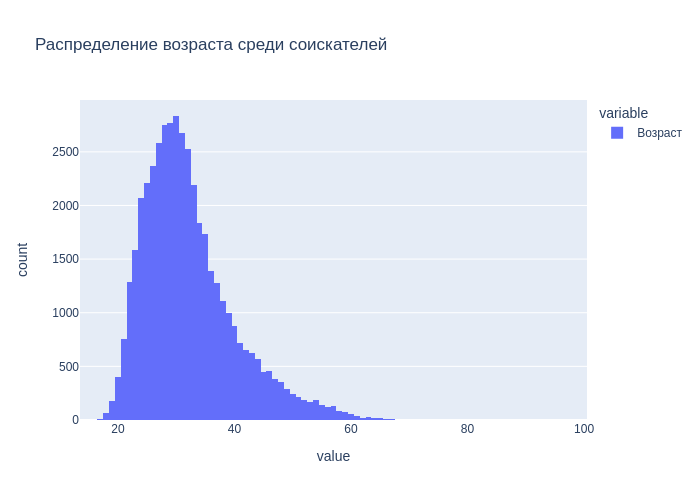

In [14]:
display(hh_df['Возраст'].mode())

fig = px.histogram(
    data_frame=hh_df['Возраст'],
    title='Распределение возраста среди соискателей'
)

fig.show("png")

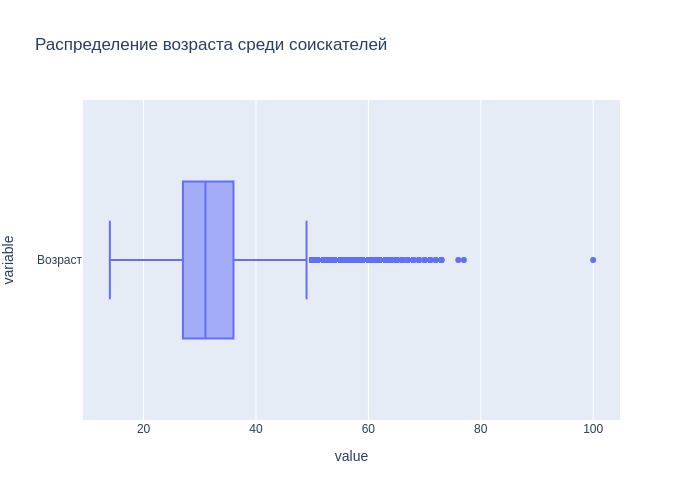

In [15]:
fig = px.box(
    data_frame=hh_df['Возраст'],
    orientation='h',
    title='Распределение возраста среди соискателей'
)

fig.show("png")

* Выводы:

  1.1 Согласно анализу, мода распределения равена 30. Возможно, это вызвано тем, что после окончания ВУЗа/училища люди склонны идти работать по распределению, на кафедру и т.д.; в более старшем же возрасте у работников уже, вероятно, наработаны связи, поэтому HeadHunter им необходимости пользоваться нет. А в 30 очень часто люди хотят сменить работу или вообще род деятельности, но достаточного опыта и востребованности пока ещё не имеют, поэтому пользуются такими сервисами для поиска работы.


  1.2 Возраст большинства соискателей находится между значениями в 27 и 36 лет.

  1.3 Ориентируясь на коробчатую диаграмму мы можем заметить аномалии, после удаления которых получим более наглядные и приятные взору графики.Непосредственно я к аномалиям бы отнёс все значения из гистограммы близкие к 0. Соответственно, рассматривал бы значения возраста начиная с 18 и заканчивая 60. До 60 - очень очевидная цифра. Мало кто будет искать работу перед наступлением пенсионного возраста, да и работодатель заинтересован в молодых сотрудниках. Новые графики с учётом возраста отображены во второй группе графиков. На мой взгляд, они более приятны глазу и на них проще видеть распределение.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0

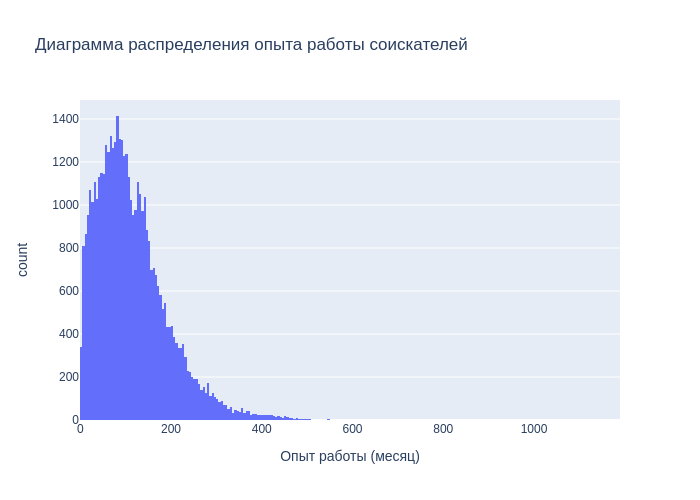

In [16]:
display(hh_df['Опыт работы (месяц)'].max())

fig = px.histogram(
    data_frame=hh_df['Опыт работы (месяц)'],
    x='Опыт работы (месяц)',
    title='Диаграмма распределения опыта работы соискателей'
)

fig.show("png")

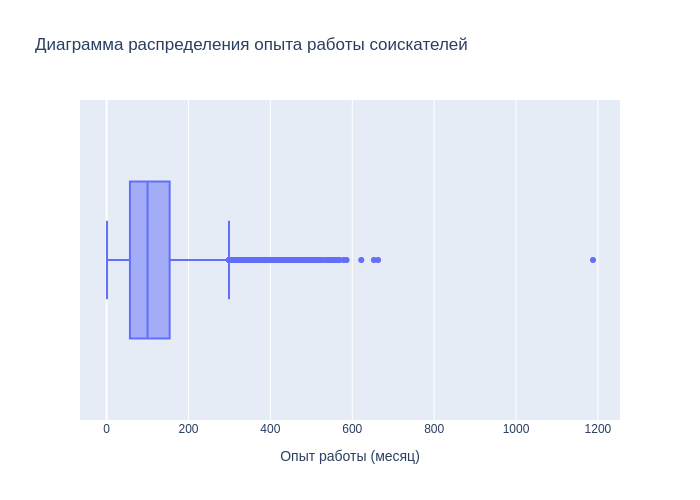

In [17]:
fig = px.box(
    data_frame=hh_df['Опыт работы (месяц)'],
    x='Опыт работы (месяц)',
    orientation='h',
    title='Диаграмма распределения опыта работы соискателей'
)

fig.show("png")

* Выводы:

  2.1 Согласно анализу, мода распределения равена 81 месяцу, что равно примерно 7 годам. Если вычесть из моды предыдущего номера это число: 30-7=23 - получим примерный возраст окончания ВУЗа:) Можно также отметить высокую корреляцию возраста с признаком опыта.


  2.2 Опыт работы большинства соискателей находится между значениями в 55 и 152 месяца.

  2.3 Ориентируясь на коробчатую диаграмму мы можем заметить аномалии, после удаления которых получим более наглядные и приятные взору графики.Непосредственно я к аномалиям бы отнёс опять же все значения из гистограммы близкие к 0. И опять бы связал это с возрастом, потому что если учесть, что пик активного поиска работы начинается в 27 лет, то через 400-450 месяцев резиденту будет примерно 60-65 лет, что будет означать выход на пенсию и отказ у большинства работодателей принимать такого сотрудника на работу в угоду "омоложения" коллектива. Поэтому исследование по признаку "опыт работы" я бы связал с исследованием по признаку "возраст". Более приятные глазу диаграммы предствлены во втором блоке.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


0    50000.0
Name: ЗП (руб), dtype: float64

сколько соискателей требуют заработную плату выше 1 миллиона рублей: 5


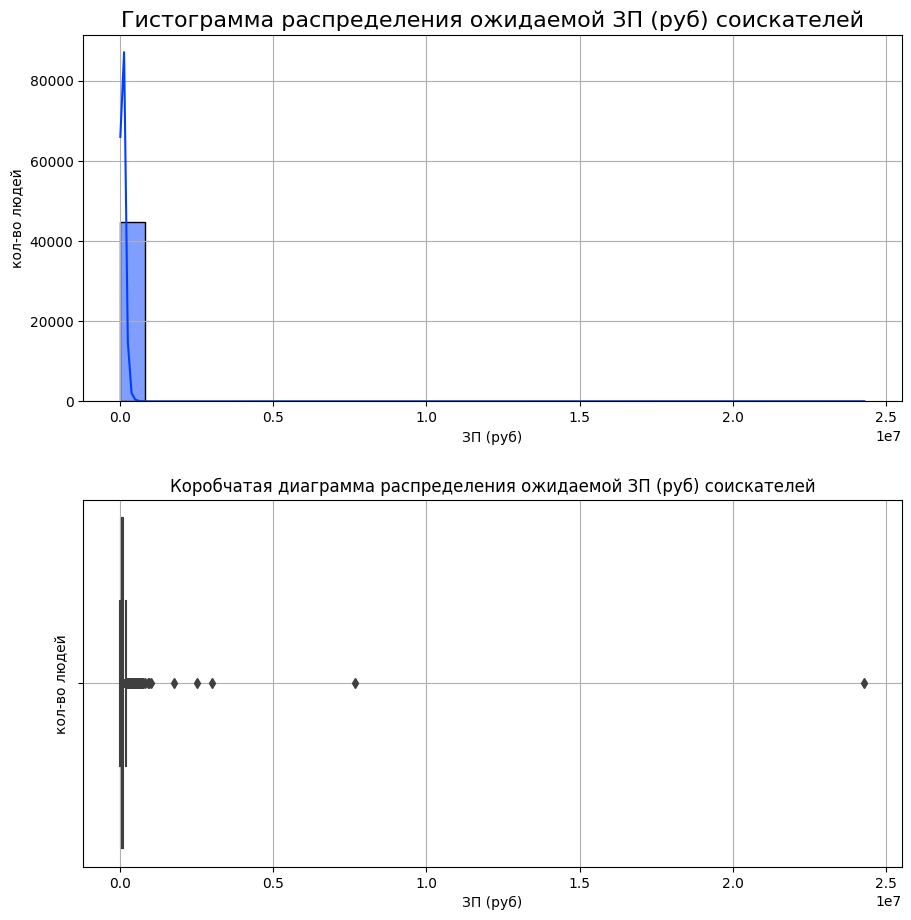

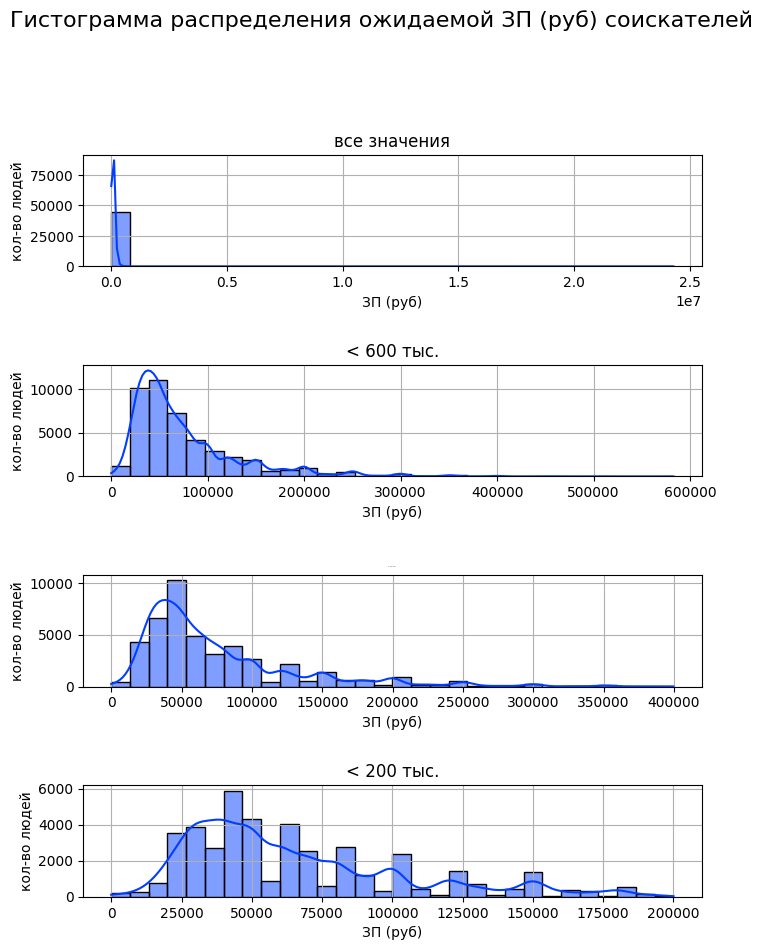

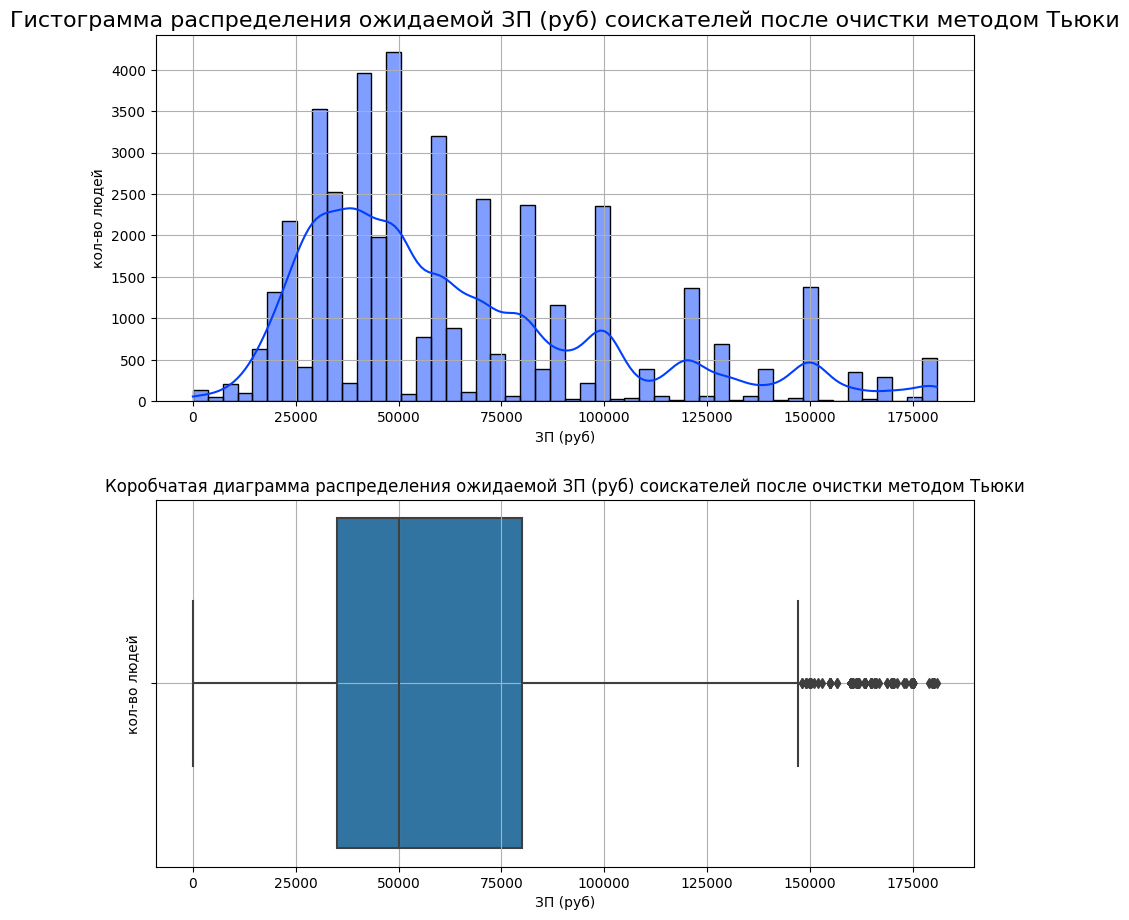

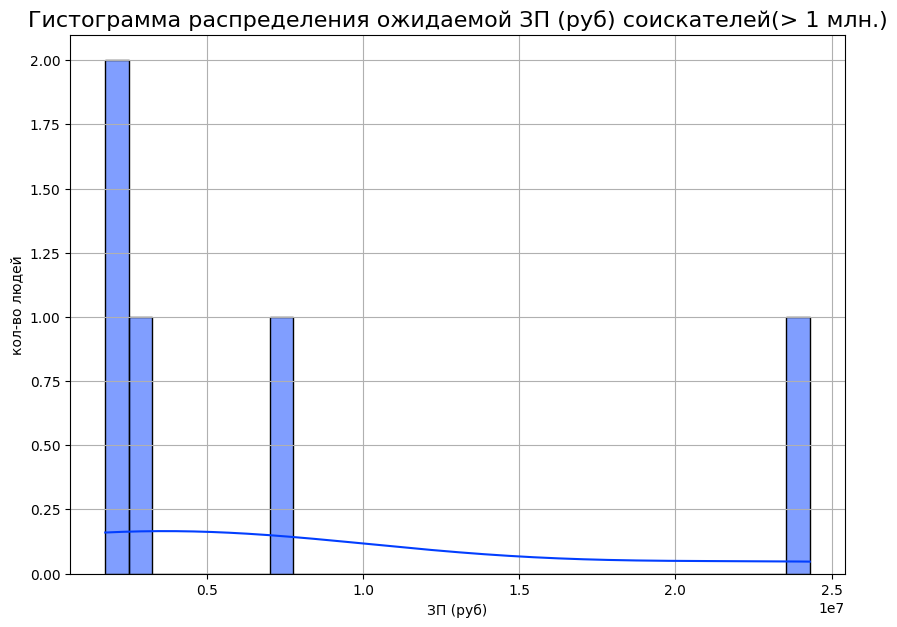

In [20]:
# ваш код здесь
display(hh_df['ЗП (руб)'].mode())

def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig.tight_layout(pad=5.0)
sns.histplot(
    data=hh_df,
    x='ЗП (руб)',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0], 
    #binwidth=10,
    ax=axes[0]
)
axes[0].set_title('Гистограмма распределения ожидаемой ЗП (руб) соискателей', fontsize=16)
axes[0].set_xlabel('ЗП (руб)')
axes[0].set_ylabel('кол-во людей')
axes[0].grid()
sns.boxplot(
    data=hh_df,
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[1]
)
axes[1].set_title('Коробчатая диаграмма распределения ожидаемой ЗП (руб) соискателей');
axes[1].set_xlabel('ЗП (руб)');
axes[1].set_ylabel('кол-во людей');
axes[1].grid()
#--------------------------------------------------------------------------------------------------------------
fig3, axes3 = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))
fig3.suptitle('Гистограмма распределения ожидаемой ЗП (руб) соискателей', fontsize=16)
fig3.tight_layout(pad=5.0)
sns.histplot(
    data=hh_df,
    x='ЗП (руб)',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0], 
    #binwidth=10,
    ax=axes3[0]
)
axes3[0].set_title('все значения', fontsize=12)
axes3[0].set_xlabel('ЗП (руб)')
axes3[0].set_ylabel('кол-во людей')
axes3[0].grid()
sns.histplot(
    data=hh_df[hh_df['ЗП (руб)'] < 600000],
    x='ЗП (руб)',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0], 
    #binwidth=10,
    ax=axes3[1]
)
axes3[1].set_title('< 600 тыс.', fontsize=12)
axes3[1].set_xlabel('ЗП (руб)')
axes3[1].set_ylabel('кол-во людей')
axes3[1].grid()
sns.histplot(
    data=hh_df[hh_df['ЗП (руб)'] < 400000],
    x='ЗП (руб)',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0], 
    #binwidth=10,
    ax=axes3[2]
)
axes3[2].set_title('< 400 тыс.', fontsize=1)
axes3[2].set_xlabel('ЗП (руб)')
axes3[2].set_ylabel('кол-во людей')
axes3[2].grid()
sns.histplot(
    data=hh_df[hh_df['ЗП (руб)'] < 200000],
    x='ЗП (руб)',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0], 
    #binwidth=10,
    ax=axes3[3]
)
axes3[3].set_title('< 200 тыс.', fontsize=12)
axes3[3].set_xlabel('ЗП (руб)')
axes3[3].set_ylabel('кол-во людей')
axes3[3].grid()
#--------------------------------------------------------------------------------------------------------------
# Очистка методом Тьюки
outliers, cleaned = outliers_iqr_mod(hh_df, 'ЗП (руб)')

fig2, axes1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig2.tight_layout(pad=5.0)
sns.histplot(
    data=cleaned,
    x='ЗП (руб)',
    bins=50,
    kde=True,
    color=sns.color_palette('bright')[0], 
    #binwidth=10,
    ax=axes1[0]
)
axes1[0].set_title('Гистограмма распределения ожидаемой ЗП (руб) соискателей после очистки методом Тьюки', fontsize=16)
axes1[0].set_xlabel('ЗП (руб)')
axes1[0].set_ylabel('кол-во людей')
axes1[0].grid()
sns.boxplot(
    data=cleaned,
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes1[1]
)
axes1[1].set_title('Коробчатая диаграмма распределения ожидаемой ЗП (руб) соискателей после очистки методом Тьюки');
axes1[1].set_xlabel('ЗП (руб)');
axes1[1].set_ylabel('кол-во людей');
axes1[1].grid()

# сколько соискателей требуют заработную плату выше 1 миллиона рублей
print(f"сколько соискателей требуют заработную плату выше 1 миллиона рублей: {hh_df[hh_df['ЗП (руб)'] > 1000000]['ЗП (руб)'].shape[0]}")
fig = plt.figure(figsize=(10, 7))
highcost_plot = sns.histplot(
    data=hh_df[hh_df['ЗП (руб)'] > 1000000],
    x='ЗП (руб)',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0]
)
highcost_plot.set_title('Гистограмма распределения ожидаемой ЗП (руб) соискателей(> 1 млн.)', fontsize=16)
highcost_plot.set_xlabel('ЗП (руб)')
highcost_plot.set_ylabel('кол-во людей')
highcost_plot.grid()

* Выводы:

  3.1 Согласно анализу, мода распределения равна 50000.0 рублей.

  3.2 Заработная плата большинства соискателей находится в пределеах от 50 до 55 тысяч рублей.

  3.3 К аномалиям я бы отнёс опять же все значения из гистограммы близкие к 0. И опять бы связал это с возрастом, потому что если учесть, что пик активного поиска работы начинается в 27 лет, то через 400-450 месяцев резиденту будет примерно 60-65 лет, что будет означать выход на пенсию и отказ у большинства работодателей принимать такого сотрудника на работу в угоду "омоложения" коллектива. Поэтому исследование по признаку "опыт работы" я бы связал с исследованием по признаку "возраст". Более приятные глазу диаграммы предствлены во втором блоке.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

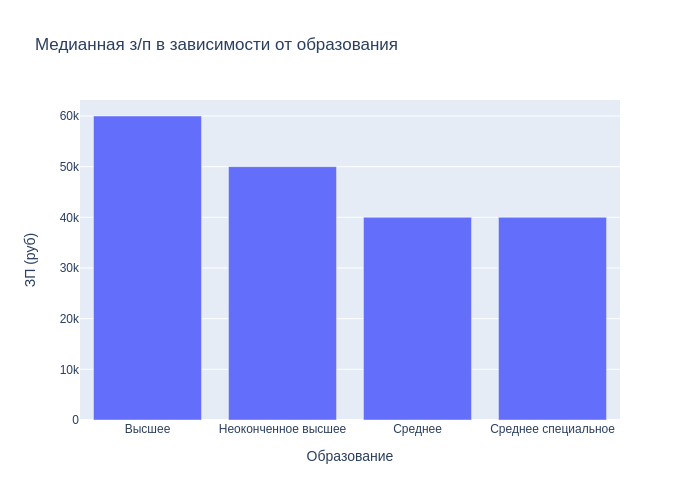

In [21]:
# ваш код здесь
fig = px.bar(
    data_frame = hh_df.groupby('Образование')['ЗП (руб)'].median(),
    y='ЗП (руб)',
    title='Медианная з/п в зависимости от образования'
)

fig.show("png")

* Выводы:

  4.1 Наибольший уровень ЗП наблюдается для соискаталей с высшим образованием, затем неокоченное высшее и на последнем месте: среднее и среднее специальное.

  4.2 Признак уровня образования несоменно важен для прогнозирования ЗП. Скорее всего соискатель считает, что грамотные специалисты должны соответственно оплачиваться.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

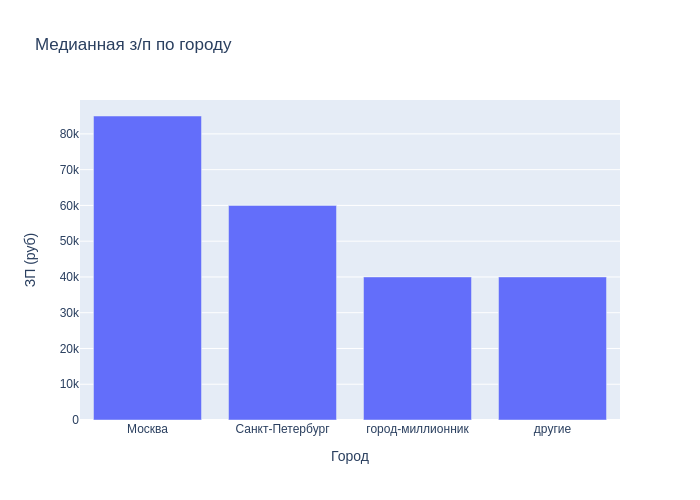

In [22]:
# ваш код здесь
fig = px.bar(
    data_frame = hh_df[hh_df['ЗП (руб)'] < 1000000].groupby('Город')['ЗП (руб)'].median(),
    y='ЗП (руб)',
    title='Медианная з/п по городу'
)

fig.show("png")


* Выводы:

  5.1 Самый высокий медианный уровень ЗП, так же как и размах отмечается в Москве. Затем Санкт-Петербург, затем все остальные города(города-миллионники и другие города).

  5.2 Признак города является важной частью при прогнозировании заработной платы. Уровень ЗП напрямую связан с городом.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

66000.0

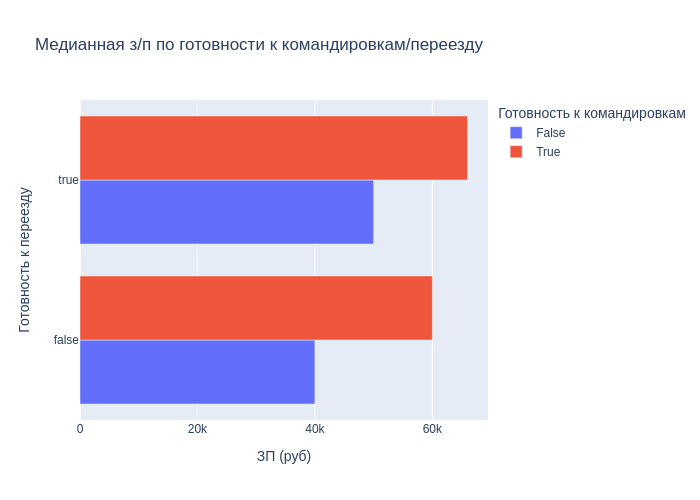

In [23]:
# ваш код здесь
#outliers, cleaned = outliers_iqr_mod(hh_df[(hh_df["Готовность к переезду"] == True) & (hh_df["Готовность к командировкам"] == True)], 'ЗП (руб)')

medianSalary = hh_df[(hh_df["Готовность к переезду"] == True) & (hh_df["Готовность к командировкам"] == True)]["ЗП (руб)"].median()
display(medianSalary)

prepared_data = hh_df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=prepared_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show("png")

* Выводы:

  6.1 Возможность сотрудника ездить в командировки и быть готовым к переезду положительно сказывается на уровне его ЗП. Что может быть вызвано тем, что командируемые люди, как правило, занимают более высокие должности.


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Text(0.5, 1.0, 'Медианная з/п в зависимости к возраста/образования')

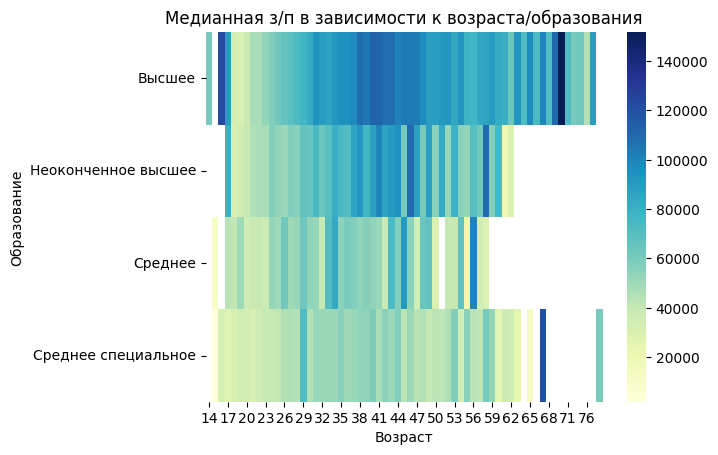

In [24]:
#'Образование', 'Возраст'
pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование'
)
pivot.columns = pivot.columns.astype('string')
#display(pivot)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Медианная з/п в зависимости к возраста/образования')

* Выводы:

  7.1 Самый быстрый рост ЗП отмечается при наличии высшего образования. Уровень образования напрямую влияет на скорость роста заработной платы.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

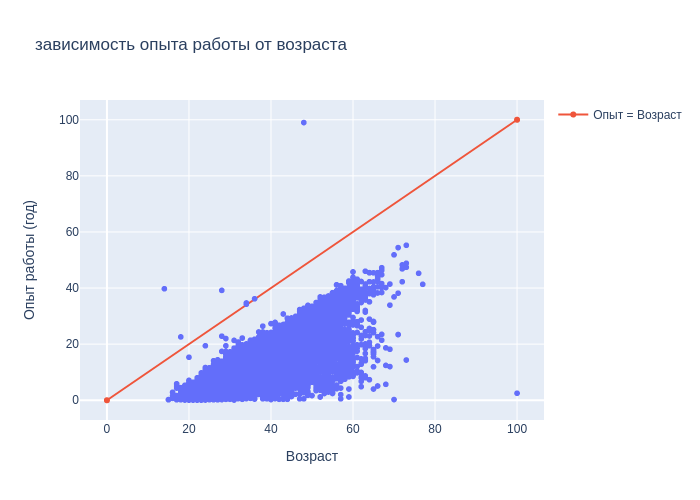

'Кол-во аномалий: 7'

In [27]:
# ваш код здесь
month_to_year = lambda x: x/12

d = {'Опыт работы (месяц)': [0, 100], 'Возраст': [0, 100]}
line_df = pd.DataFrame(data=d)

fig = px.scatter(hh_df, 
    y=hh_df['Опыт работы (месяц)'].apply(month_to_year),
    x=hh_df['Возраст'],
    title="зависимость опыта работы от возраста"
)

fig.add_scatter(y=line_df['Опыт работы (месяц)'], x=line_df['Возраст'], name='Опыт = Возраст')

fig.update_layout(
    yaxis_title="Опыт работы (год)",
)

fig.show("png")

display(f"Кол-во аномалий: {hh_df[hh_df['Опыт работы (месяц)'].apply(month_to_year) >= hh_df['Возраст']].shape[0]}" )

* Выводы:

  8.1 На графике прослеживается чёткая зависимость опыта работы от возраста, по которой можно сделать вывод, что часть кандидатов лукавит при указании своего опыта работы. Возможно, к аномалиям надо относить не только случаи, когда значение опыта выше линии "опыт работы = возраст", но и те, когда "опыт работы = возраст - *законный возраст начала работы в стране*"

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Text(0.5, 1.0, 'Медианная з/п в зависимости к города/образования')

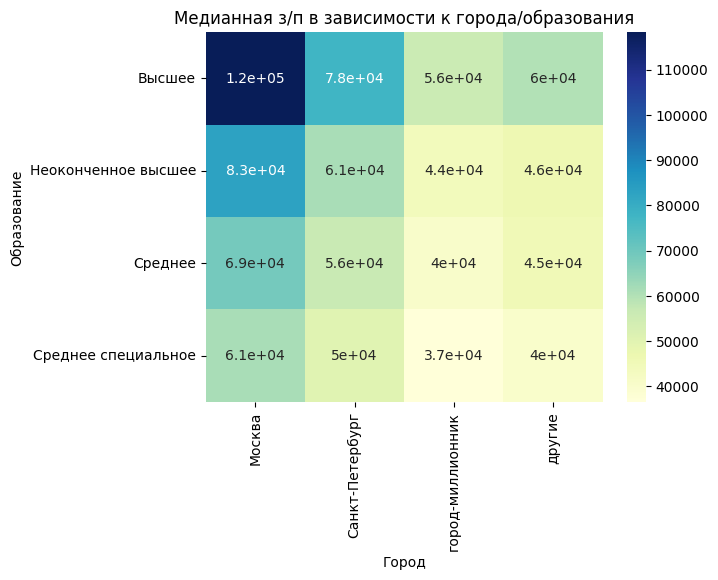

In [28]:
# ваш код здесь
pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    columns='Город',
    index='Образование'
)
pivot.columns = pivot.columns.astype('string')
#display(pivot)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu',annot=True)
heatmap.set_title('Медианная з/п в зависимости к города/образования')

* Выводы:

  9.1 На графике прослеживается чёткая зависимость опыта работы от возраста, по которой можно сделать вывод, что часть кандидатов лукавит при указании своего опыта работы. Возможно, к аномалиям надо относить не только случаи, когда значение опыта выше линии "опыт работы = возраст", но и те, когда "опыт работы = возраст - *законный возраст начала работы в стране*"

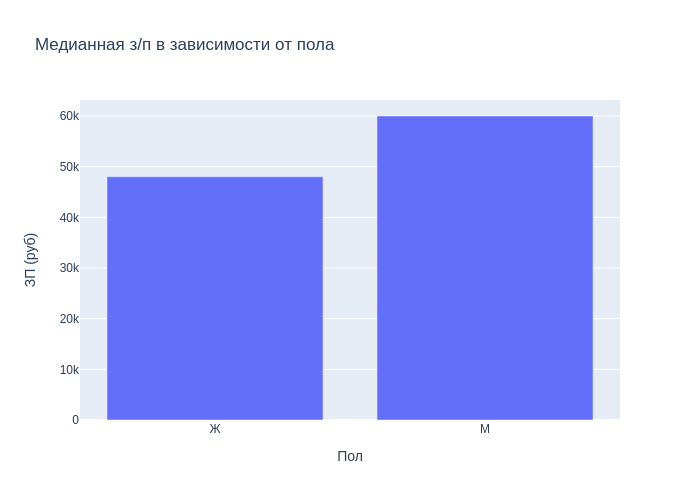

In [29]:
fig = px.bar(
    data_frame = hh_df.groupby('Пол')['ЗП (руб)'].median(),
    y='ЗП (руб)',
    title='Медианная з/п в зависимости от пола'
)

fig.show("png")

* Выводы:

  10.1 В соответствии с графиком, мужчины могут расчитывать на большую ЗП, чем женщины.

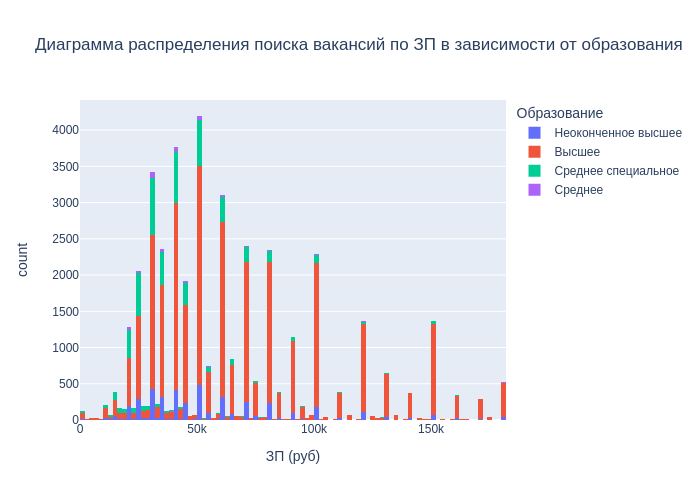

In [30]:
outliers, cleaned = outliers_iqr_mod(hh_df, 'ЗП (руб)')

fig = px.histogram(
    data_frame=cleaned,
    x='ЗП (руб)',
    color='Образование',
    title='Диаграмма распределения поиска вакансий по ЗП в зависимости от образования'
)

fig.show("png")

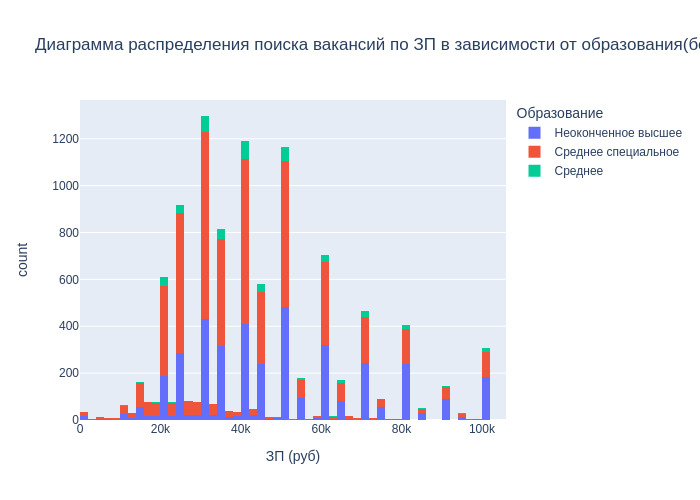

In [31]:
outliers, cleaned = outliers_iqr_mod(hh_df[hh_df['Образование'] != 'Высшее'], 'ЗП (руб)')

fig = px.histogram(
    data_frame=cleaned,
    x='ЗП (руб)',
    color='Образование',
    title='Диаграмма распределения поиска вакансий по ЗП в зависимости от образования(без высшего)'
)

fig.show("png")

* Выводы:

  11.1 В соответствии с графиками, абсолютно везде доминируют соискатели с высшим образованием. Однако до ЗП в 70 тысяч рублей соискатели с высшим образованием могут сталкиваться с конкуренцией. Основные конкуренты - люди со средним специальным образованием, затем - люди с неоконченным высшим. Если не рассматривать соискателей с высшим образованием, то соискателей с средним образованием в полтора раза больше, чем соискателей с неоконченным высшим.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [32]:
# ваш код здесь
dupl_columns = list(hh_df.columns)

mask = hh_df.duplicated(subset=dupl_columns)
hh_duplicates = hh_df[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

hh_df = hh_df.drop_duplicates(subset=dupl_columns)

Число найденных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [33]:
# ваш код здесь
cols_null_percent = hh_df.isnull().sum()
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [34]:
# ваш код здесь
hh_df = hh_df.dropna(axis='index', how='any', subset=['Последнее/нынешнее место работы'])
hh_df = hh_df.dropna(axis='index', how='any', subset=['Последняя/нынешняя должность'])

values = {
    'Опыт работы (месяц)': hh_df['Опыт работы (месяц)'].median()
}
hh_df = hh_df.fillna(values)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [35]:
# ваш код здесь
hh_df['ЗП (руб)'] = pd.to_numeric(hh_df['ЗП (руб)'])
hh_df = hh_df.loc[(hh_df['ЗП (руб)'] < 1000000)]
hh_df = hh_df.loc[(hh_df['ЗП (руб)'] > 1000)]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [36]:
# ваш код здесь
hh_df['Опыт работы (месяц)'] = pd.to_numeric(hh_df['Опыт работы (месяц)'])
hh_df['Возраст'] = pd.to_numeric(hh_df['Возраст'])

hh_df = hh_df.loc[(hh_df['Опыт работы (месяц)']/12 < hh_df['Возраст'])]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [37]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, hh_df = outliers_z_score_mod(hh_df, 'Возраст', 3, 4, log_scale=True)
print(outliers.shape[0])
print(hh_df.shape[0])

3
44459


As = 0.46958278669989173


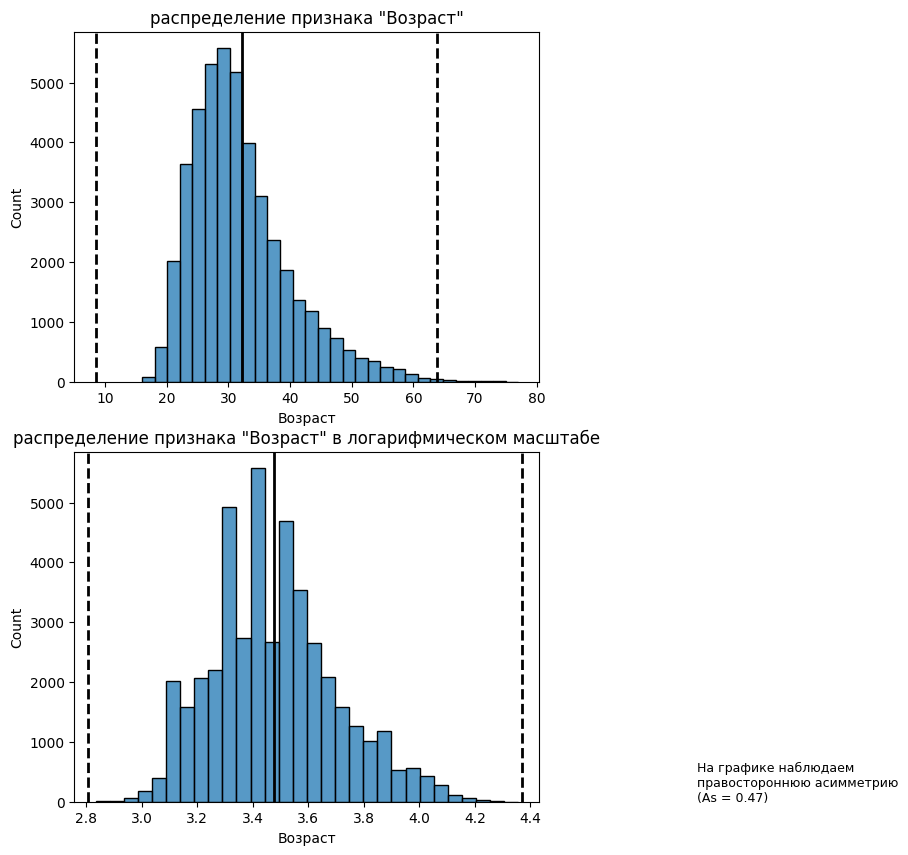

In [38]:
# ваш код здесь

fig, axes = plt.subplots(2, 1, figsize=(6, 10))

sns.histplot(hh_df['Возраст'], bins=30, ax=axes[0])
axes[0].axvline(hh_df['Возраст'].mean(), color='k', lw=2)
axes[0].axvline(hh_df['Возраст'].mean()+ 4 * hh_df['Возраст'].std(), color='k', ls='--', lw=2)
axes[0].axvline(hh_df['Возраст'].mean()- 3 * hh_df['Возраст'].std(), color='k', ls='--', lw=2)
axes[0].set_title('распределение признака "Возраст"')

log_hh_df = np.log(hh_df['Возраст']+1)
sns.histplot(log_hh_df, bins=30, ax=axes[1])
axes[1].axvline(log_hh_df.mean(), color='k', lw=2)
axes[1].axvline(log_hh_df.mean()+ 4 * log_hh_df.std(), color='k', ls='--', lw=2)
axes[1].axvline(log_hh_df.mean()- 3 * log_hh_df.std(), color='k', ls='--', lw=2)
axes[1].set_title('распределение признака "Возраст" в логарифмическом масштабе')
axes[1].text(5, 10,'На графике наблюдаем\nправостороннюю асимметрию\n(As = 0.47)', fontsize=9)

print(f"As = {log_hh_df.skew()}") 


* Выводы:
  1. На графике наблюдаем правостороннюю асимметрию (As = 0.4726)
  2. В соответствии с таблицей выбросов, в неё попадают соискатели с возрастом 15 и 100 лет. Что логично, так как в России можно работать с 16 лет. А после наступления(да и в принципе, при приближении) пенсионного возраста уже практически никто не ищет работу.

#### Мы закончили очистку данных. Некоторые данные мы очистили вручную, а некоторые вручную, некоторые автоматически. После всех совершённых операций с данными мы получили dataframe, из которого можно быстро и эффективно получать информацию.